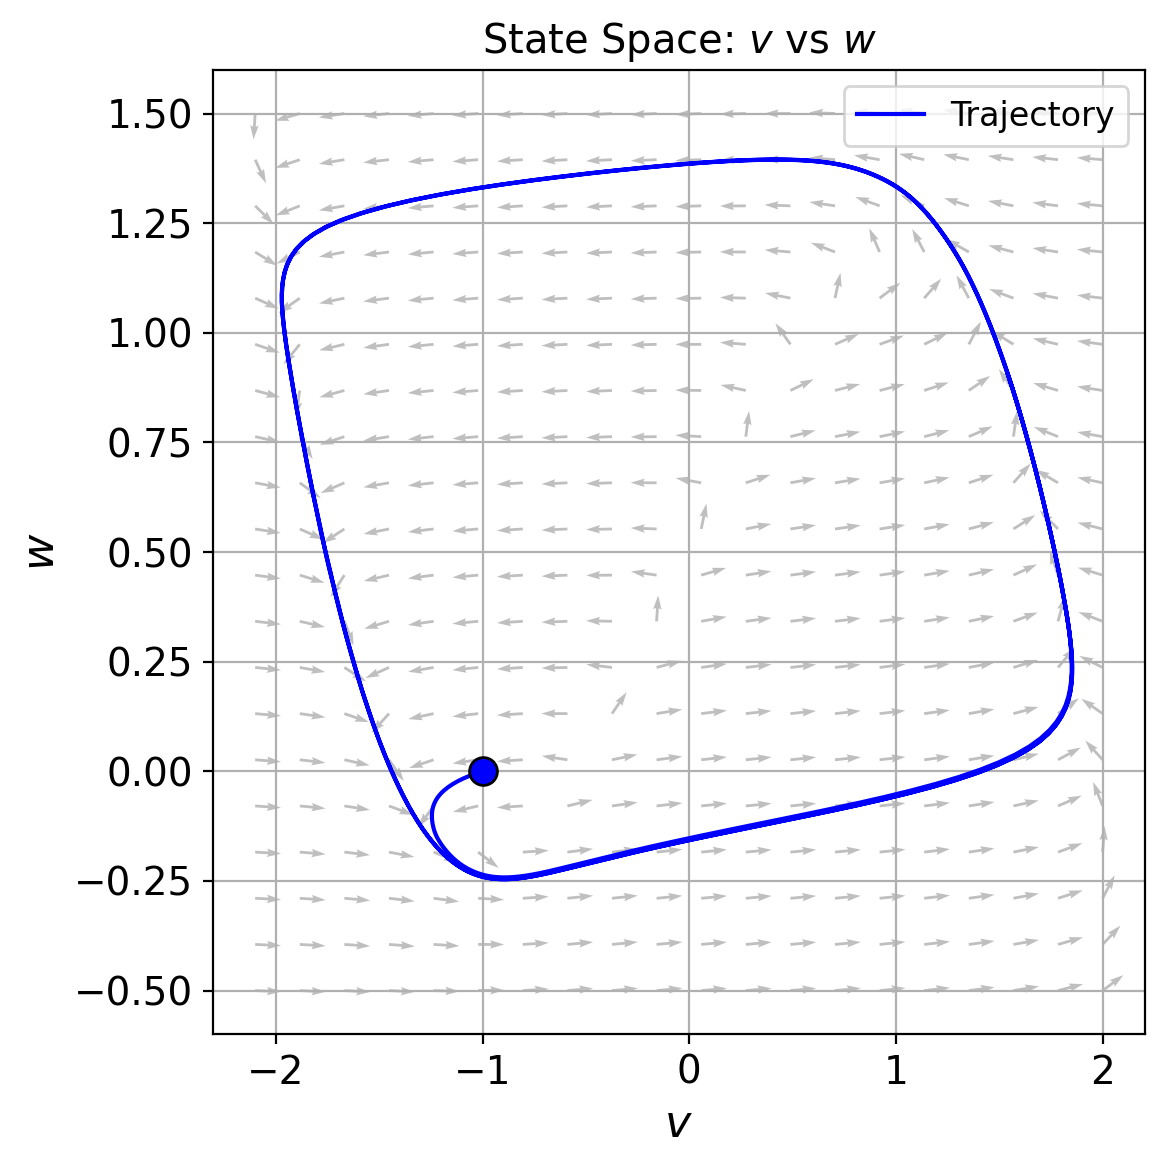

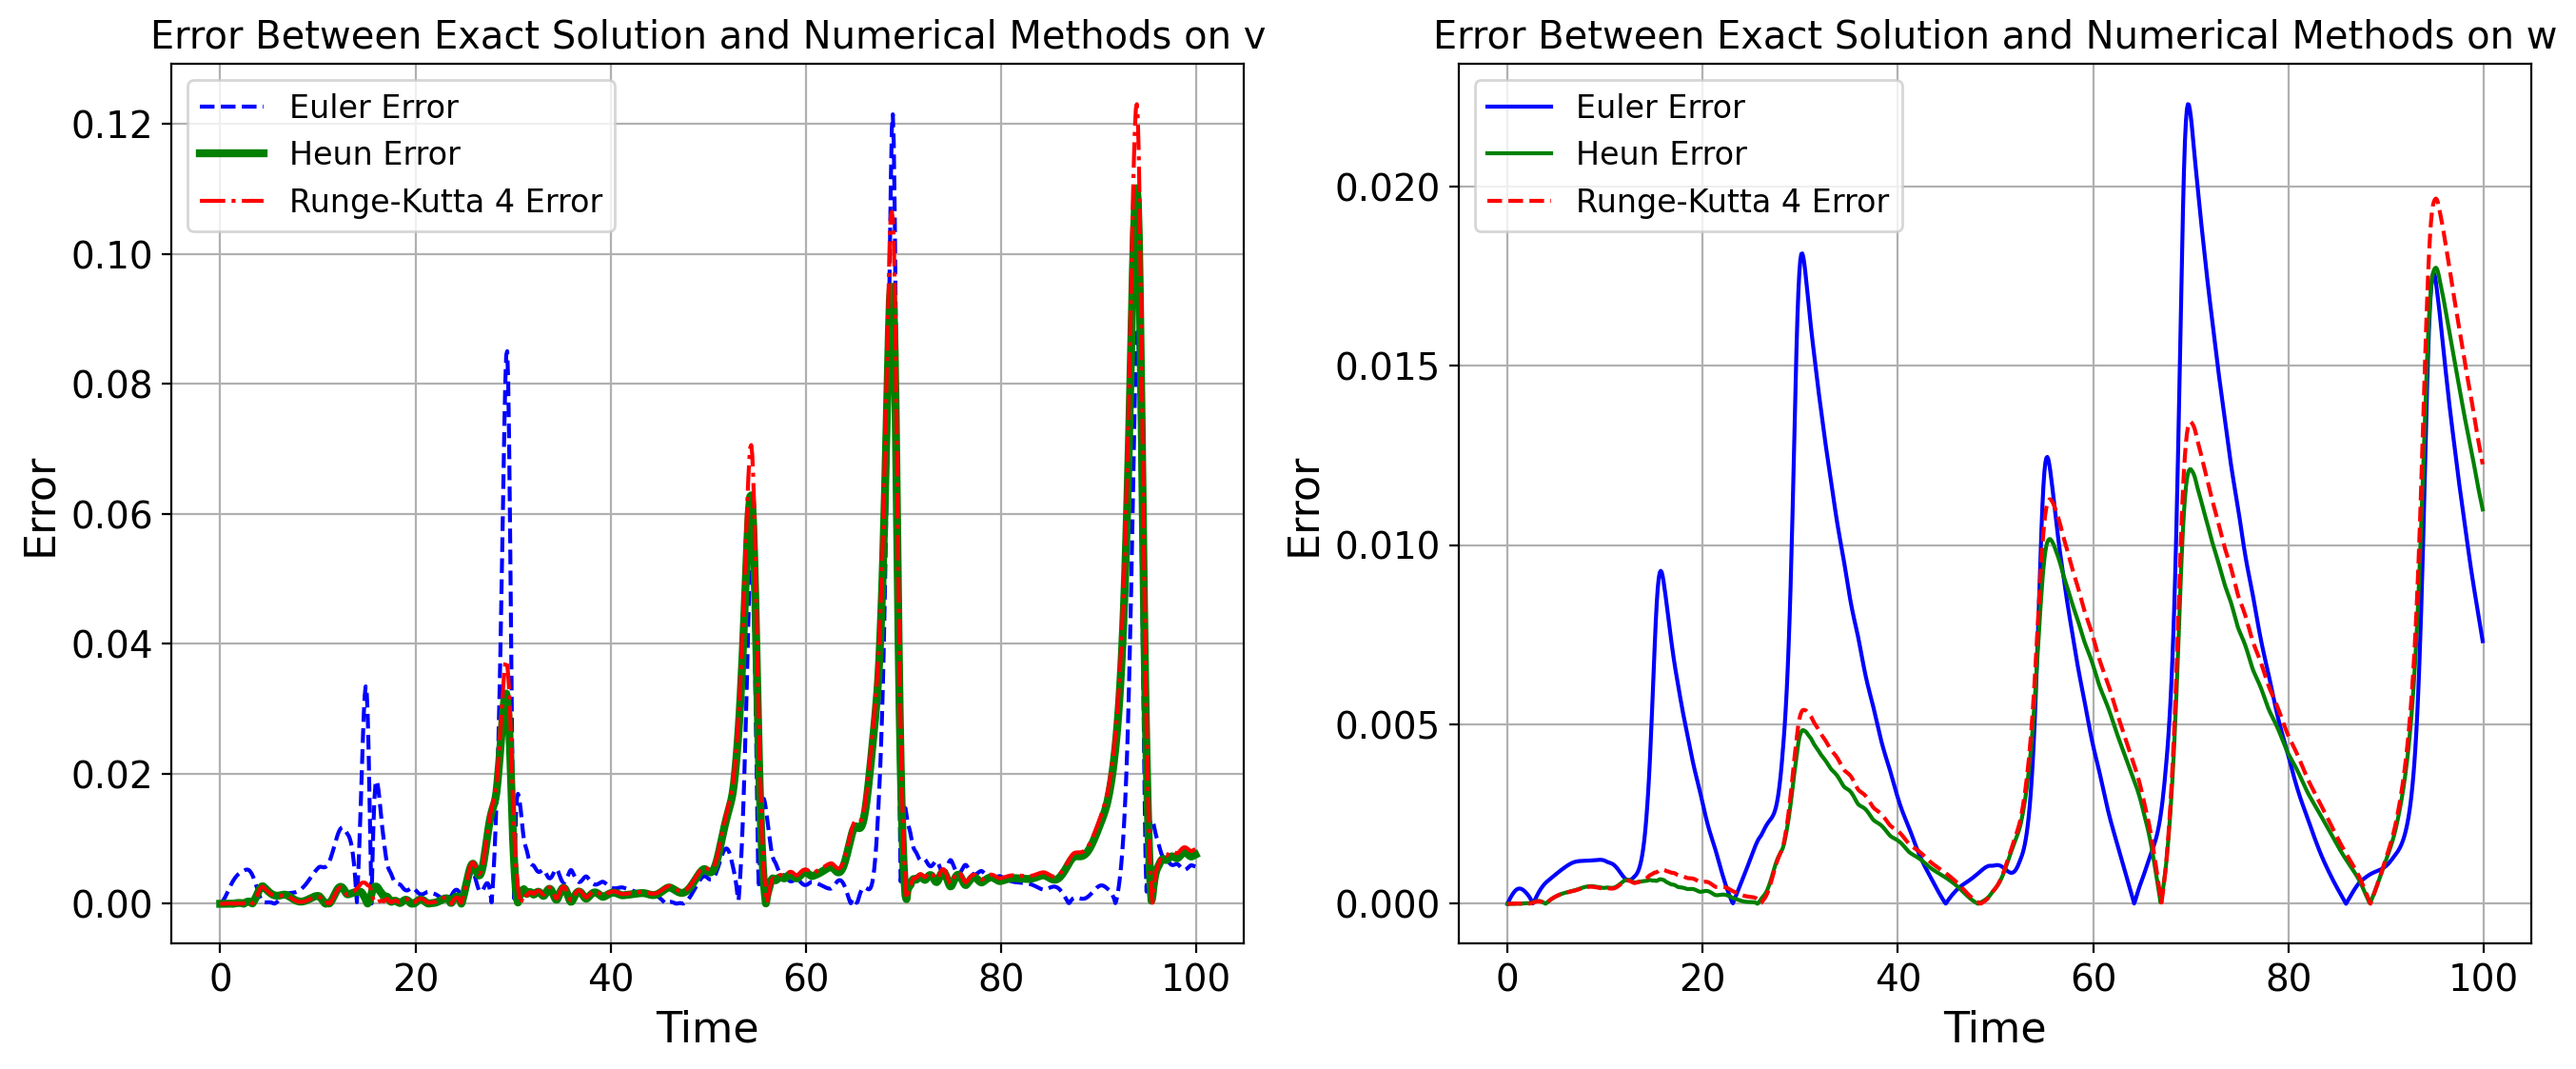

In [1]:
# Import necessary libraries

%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# plotting preferences updates
colors = ['#132A36', '#780627','#4692BD', '#079069']

# Set plotting parameters
params = {'figure.figsize': (6.0,6.0),
          'axes.labelsize': 16,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'legend.fontsize': 12,
          'font.size': 12
           }

plt.rcParams.update(params)

# Euler method 1st Order method
def euler_method(f, y0, t_span, h):
    t_vals = np.arange(t_span[0], t_span[1], h)
    y_vals = np.zeros((len(t_vals), len(y0)))
    y_vals[0] = y0
    for i in range(1, len(t_vals)):
        y_vals[i] = y_vals[i-1] + h * f(t_vals[i-1], y_vals[i-1])
    return t_vals, y_vals.T

# Heun method 2nd Order method
def heun_method(f, y0, t_span, h):
    t_vals = np.arange(t_span[0], t_span[1], h)
    y_vals = np.zeros((len(t_vals), len(y0)))
    y_vals[0] = y0
    for i in range(1, len(t_vals)):
        k1 = f(t_vals[i-1], y_vals[i-1])
        k2 = f(t_vals[i-1] + h, y_vals[i-1] + h * k1)
        y_vals[i] = y_vals[i-1] + (h / 2) * (k1 + k2)
    return t_vals, y_vals.T

# Runge-Kutta 4th Order method
def runge_kutta_method(f, y0, t_span, h):
    t_vals = np.arange(t_span[0], t_span[1], h)
    y_vals = np.zeros((len(t_vals), len(y0)))
    y_vals[0] = y0
    for i in range(1, len(t_vals)):
        k1 = f(t_vals[i-1], y_vals[i-1])
        k2 = f(t_vals[i-1] + h/2, y_vals[i-1] + h*k1/2)
        k3 = f(t_vals[i-1] + h/2, y_vals[i-1] + h*k2/2)
        k4 = f(t_vals[i-1] + h, y_vals[i-1] + h*k3)
        y_vals[i] = y_vals[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return t_vals, y_vals.T

# FitzHugh-Nagumo Model
def FitzHugh_Nagumo(t, z, I=0.5, epsilon=0.08, a=0.7, b=0.8):
    v,w = z
    dv = v - (v**3)/3 - w + I
    dw = epsilon*(v + a - b*w)
    return np.array([dv,dw])

# time step
h = 0.1

# initial condition
v0 = -1.0
w0 = 0.0
ic = [v0, w0]

# Time span for the simulation
t_span = (0,100)
t_eval = np.arange(t_span[0], t_span[1], h)

# Solve the differential equations, this is our exact solution
sol = solve_ivp(FitzHugh_Nagumo, t_span, ic, t_eval=t_eval)

# Create figure for 2D plot
fig = plt.figure(figsize=(6, 6))

# Vector field for the system
x1_vals = np.linspace(-2.1, 2, 20)
x2_vals = np.linspace(-0.5, 1.5, 20)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# U = X1 - (X1**3)/3 - X2 + I
# V = epsilon*(X1 + a - b*X2)
U,V = FitzHugh_Nagumo(0, [X1, X2])

# Normalize the vectors for better visualization
speed = np.sqrt(U**2 + V**2)
U, V = U / speed, V / speed

# Plot the vector field (direction of the flow)
plt.quiver(X1, X2, U, V, color='gray', alpha=0.5)

# Plot the trajectory
plt.plot(sol.y[0], sol.y[1], label='Trajectory', color='b')

# Indicate the initial conditions with large circles
plt.scatter(v0, w0, color='b', s=100, edgecolor='k', zorder=5)

# Add labels and titles
plt.title('State Space: $v$ vs $w$')
plt.xlabel('$v$')
plt.ylabel('$w$')

# Show the legend
plt.legend(loc='upper right')

# Display the grid
plt.grid(True)


# Show the plot
plt.tight_layout()
plt.show()

# Solve using all methods
t_euler, y_euler = euler_method(FitzHugh_Nagumo, ic, t_span, h)
t_heun, y_heun = heun_method(FitzHugh_Nagumo, ic, t_span, h)
t_rk4, y_rk4 = runge_kutta_method(FitzHugh_Nagumo, ic, t_span, h)

# Error analysis of v
error_euler_v = np.abs(sol.y[0] - y_euler[0])
error_heun_v = np.abs(sol.y[0] - y_heun[0])
error_rk4_v = np.abs(sol.y[0] - y_rk4[0])

# Error analysis of w
error_euler_w = np.abs(sol.y[1] - y_euler[1])
error_heun_w = np.abs(sol.y[1] - y_heun[1])
error_rk4_w = np.abs(sol.y[1] - y_rk4[1])

# Plot error of v
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(sol.t, error_euler_v, label="Euler Error", color="blue", linestyle='--')
plt.plot(sol.t, error_heun_v, label="Heun Error", color="green", linewidth=3)
plt.plot(sol.t, error_rk4_v, label="Runge-Kutta 4 Error", color="red", linestyle='-.')
plt.xlabel("Time")
plt.ylabel("Error")
plt.title("Error Between Exact Solution and Numerical Methods on v")
plt.legend()
plt.grid(True)
# Plot error of w
plt.subplot(1,2,2)
plt.plot(sol.t, error_euler_w, label="Euler Error", color="blue")
plt.plot(sol.t, error_heun_w, label="Heun Error", color="green")
plt.plot(sol.t, error_rk4_w, label="Runge-Kutta 4 Error", color="red", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Error")
plt.title("Error Between Exact Solution and Numerical Methods on w")
plt.legend()
plt.grid(True)
plt.show()